# Anomaly Detection on Credit Cards 💳

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/creditcard.csv/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print(f"Number of NaN values in each columns: \n\n{df.isnull().sum()}")

Number of NaN values in each columns: 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
print(f"Total number of missing values is: {df.isnull().sum().sum()}")

Total number of missing values is: 0


In [8]:
print(f"Total number of duplicated values is: {df.duplicated().sum()}")

Total number of duplicated values is: 1081


In [9]:
# See some duplicated values
df[df.duplicated()].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

- We have imbalance data.

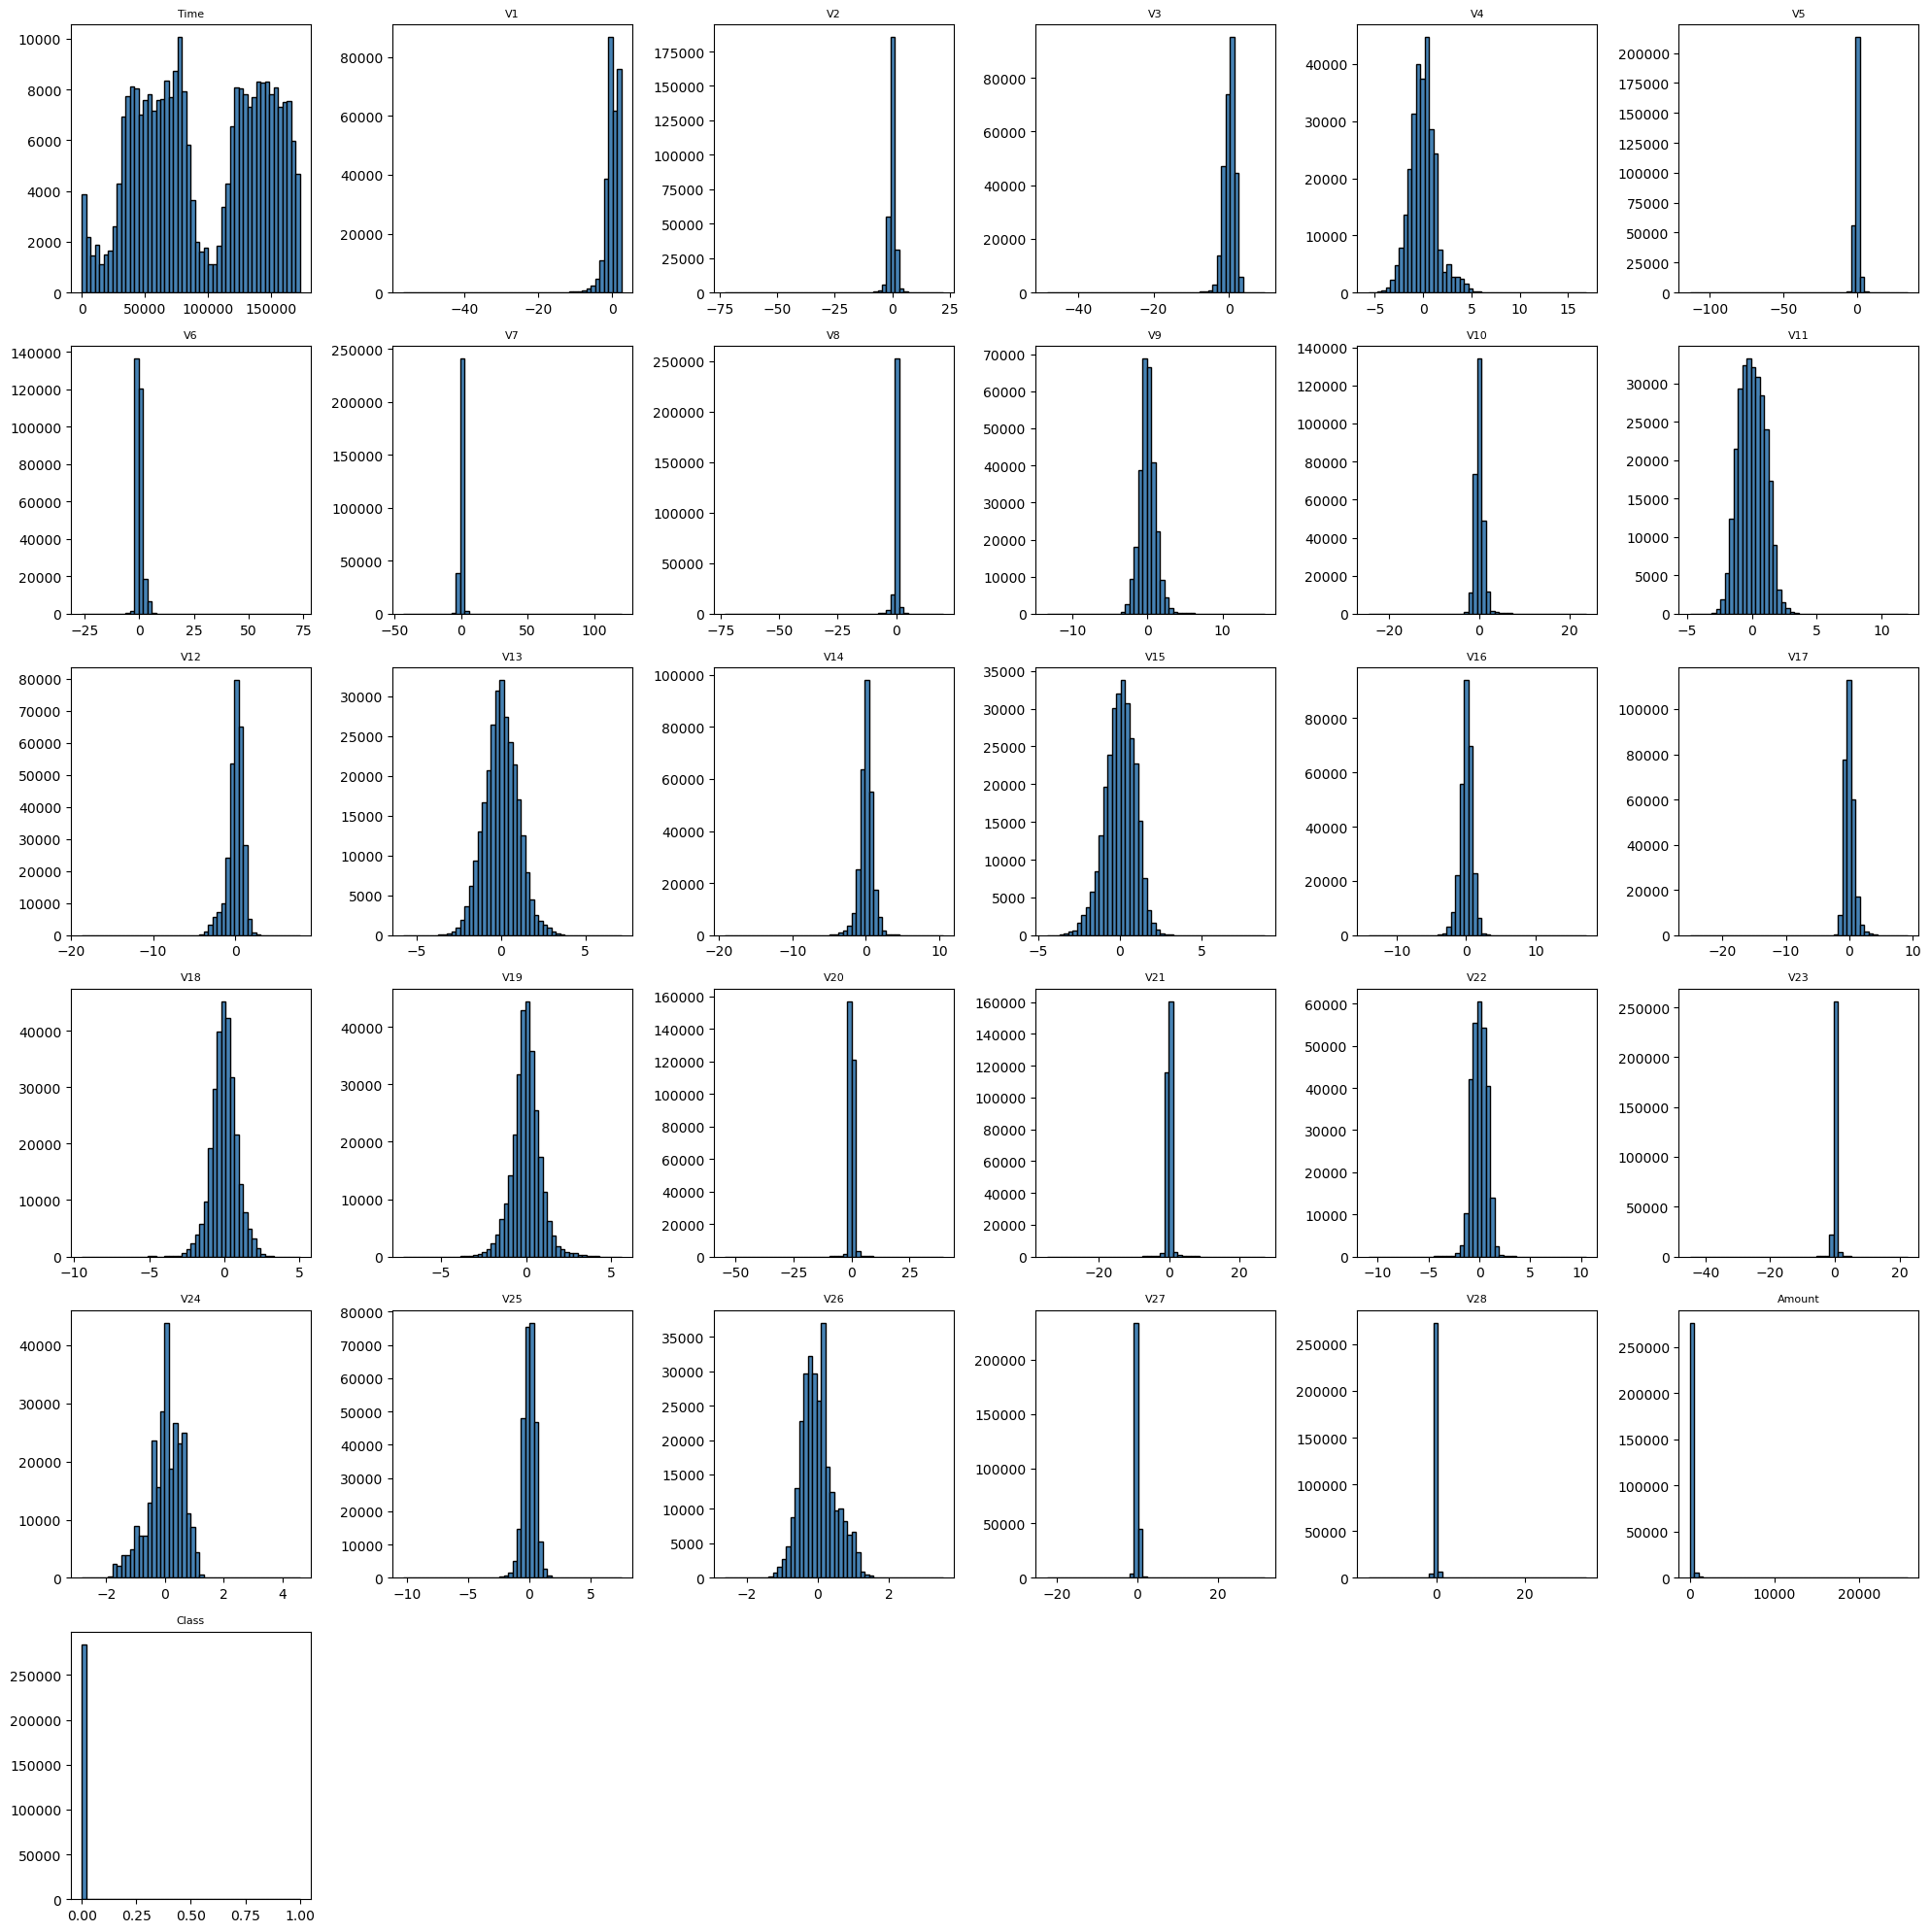

In [13]:
features = df.columns.tolist()

n_features = len(features)

plt.figure(figsize=(20, 20))

for i, col in enumerate(features, 1):
    plt.subplot(6, 6, i)   
    plt.hist(df[col], bins=50, color="steelblue", edgecolor="black")
    plt.title(col, fontsize=8)
    plt.tight_layout()

plt.show()


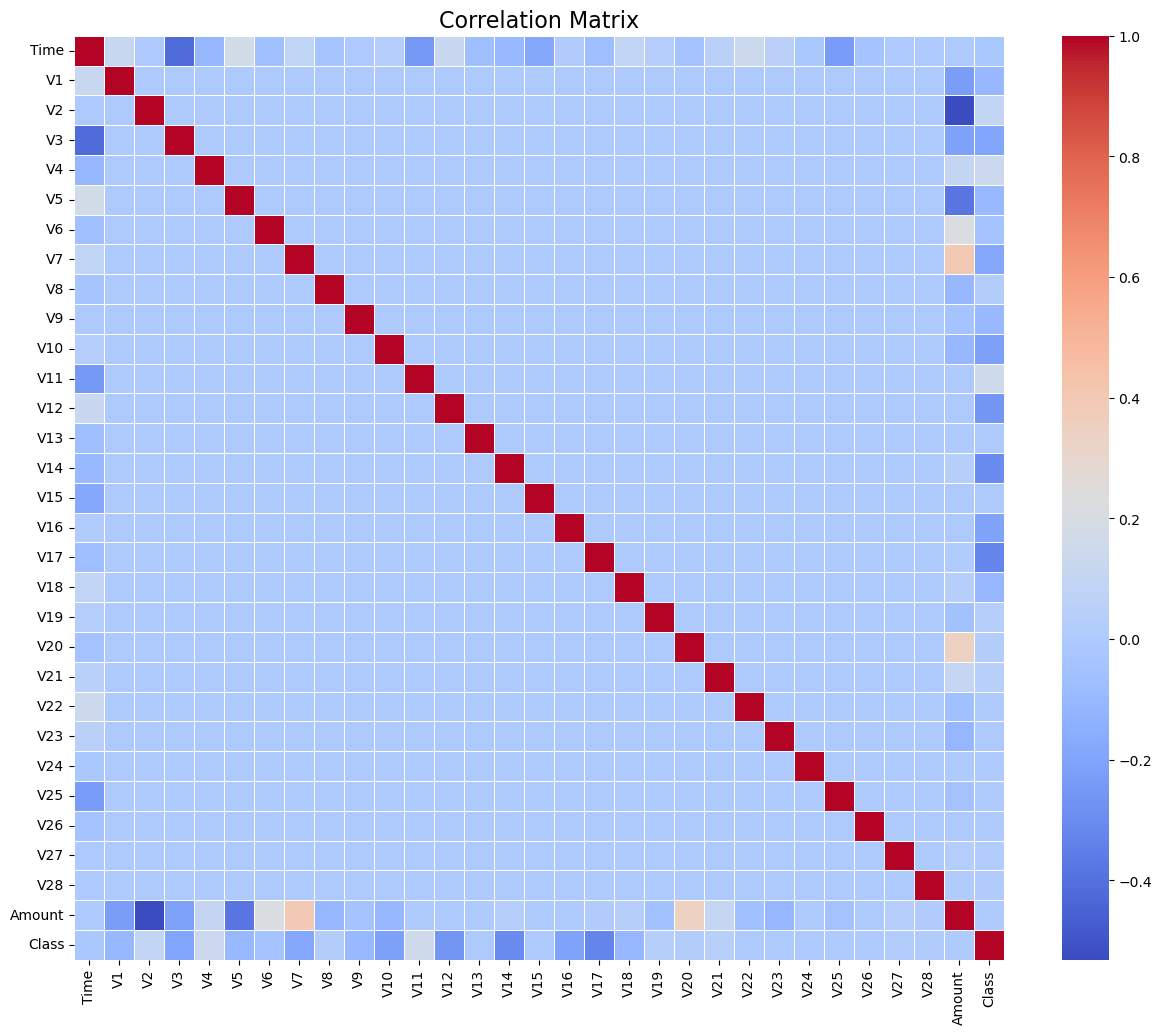

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    annot=False,   
    linewidths=0.5
)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [15]:
# Dimentionaly Reduction for visualization
# PCA

X = df.iloc[:, :-1]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


pca2 = PCA(n_components=2)
pca2.fit(df_scaled)

PCA(n_components=2)

In [16]:
pca2.explained_variance_ratio_

array([0.06527521, 0.05612313])

In [17]:
df_transformed_2 = pd.DataFrame(pca2.transform(df_scaled), columns=[f'PC{i + 1}' for i in range(2)])
df_transformed_2.head()

,PC1,PC2
0,0.416630,-2.532664
1,-0.393453,-2.077326
2,1.868525,-2.533497
3,0.315744,-1.783506
4,-0.004379,-1.488415


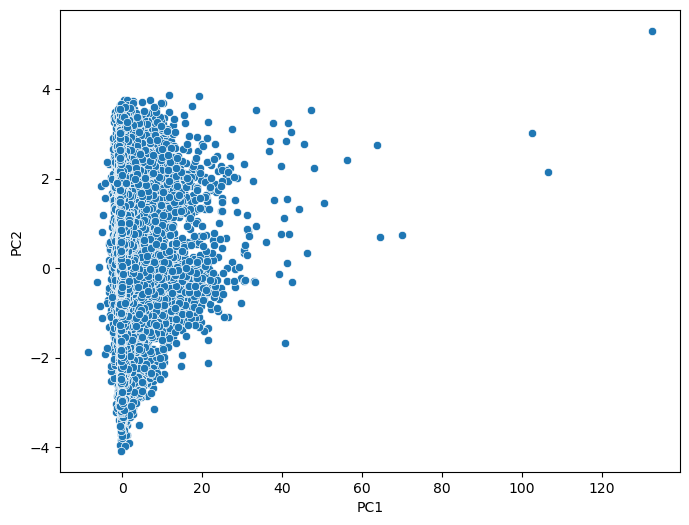

In [18]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_transformed_2)
plt.show()

In [19]:
pca3 = PCA(n_components=3)
pca3.fit(df_scaled)

PCA(n_components=3)

In [20]:
pca3.explained_variance_ratio_

array([0.06527521, 0.05612313, 0.03333333])

In [21]:
df_transformed_3 = pd.DataFrame(pca3.transform(df_scaled), columns=[f'PC{i + 1}' for i in range(3)])
df_transformed_3.head()

,PC1,PC2,PC3
0,0.416630,-2.532664,0.615758
1,-0.393453,-2.077326,0.600298
2,1.868525,-2.533497,-0.071945
3,0.315744,-1.783506,-0.175553
4,-0.004379,-1.488415,-0.445403


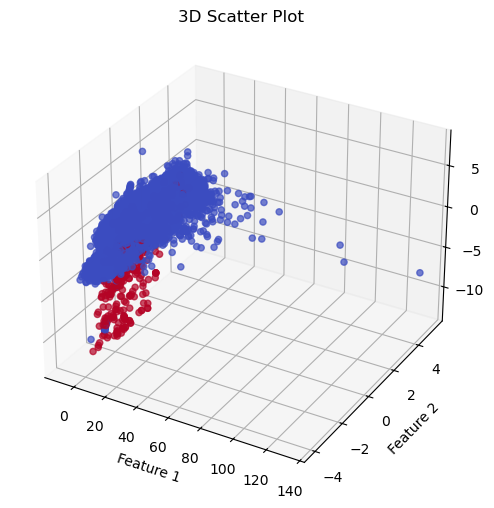

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(df_transformed_3["PC1"], df_transformed_3["PC2"], df_transformed_3["PC3"], 
                     c=df["Class"], cmap="coolwarm", alpha=0.7)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D Scatter Plot")

plt.show()

In [23]:
# T-SNE
from sklearn.manifold import TSNE

sampled_df = df_scaled.sample(10000, random_state=42)  
tsne2 = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
transformed_tsne_2 = pd.DataFrame(
    tsne2.fit_transform(sampled_df),
    columns=['Components_1', 'Components_2']
)

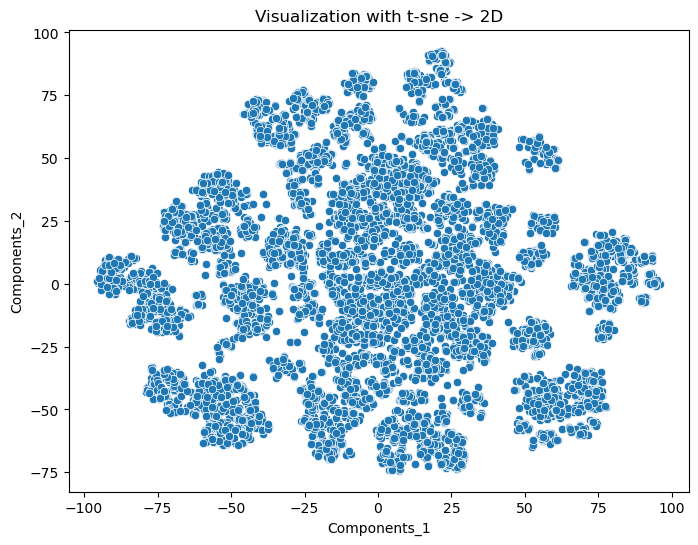

In [24]:
# Visualization with t-sne -> 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Components_1', y='Components_2', data=transformed_tsne_2)
plt.title('Visualization with t-sne -> 2D')
plt.show()

In [ ]:
tsne3 = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
transformed_tsne_3 = pd.DataFrame(tsne3.fit_transform(sampled_df), columns=[f'Components_{i + 1}' for i in range(3)])
transformed_tsne_3.head()

In [ ]:
# Visualization with t-sne -> 3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(transformed_tsne_3["Components_1"],
                     transformed_tsne_3["Components_2"],
                     transformed_tsne_3["Components_3"], 
                    cmap="coolwarm",
                     alpha=0.2)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D Scatter Plot")

plt.show()